In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df_red = pd.read_csv("winequality-red.csv",sep=";" )
df_white = pd.read_csv("winequality-white.csv", sep = ";")

In [9]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
df_red.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [11]:
from sklearn.preprocessing import StandardScaler

Part 1.1

In [12]:
def pca_user(data,components=2):
    
    #1. Statndardize the points, make mean to be on origin
    scale = StandardScaler()
    scale.fit(data)
    scaledData = scale.transform(data)

    #2. Covariance matrix
    scaledDataTrans = scaledData.T #each row is an attribute and each column is an observation
    #transforming according to numpy
    covariance_matrix = np.cov(scaledDataTrans)

    #3. Getting eigen values and vectors
    eigenValues, eigenVectors = np.linalg.eig(covariance_matrix)
    #In this eigenvectors are unit vector
    # vector matrix = [[v11,v21,v31],[v12,v22,v32],[v13,v23,v33]]
    # transpose(vector matrix) = [[v11,v12,v13],[v21,v22,v23],[v31,v32,v33]]
    
    #4. Sorting
    indices_desc = np.argsort(eigenValues)[::-1]
    eigenValuesSorted = eigenValues[indices_desc]
    eigenVectorsSorted = eigenVectors[:, indices_desc]

    
    #5. Projecting    
    # projection(magnitude) = a.b/|b|
    # => a.(b_unitvect)
    # => a = data(sample * feature) 
    # => b_unitvect = vertical vector
    # transpose(vector matrix) = [[v11,v12,v13],[v21,v22,v23],[v31,v32,v33]]
    b = eigenVectorsSorted.T
    a = scaledData
    final_pca = []
    for i in range(components):
        # print(a.shape,b[i].shape)
        c1 = np.dot(a,b[i])
        final_pca.append(c1)    
    
    return np.array(final_pca)

Part 1.2

In [13]:
#Red wine
features_red = df_red.drop("quality",axis=1).to_numpy()
red_pca_user_2d = pca_user(features_red, components=2)
# red_pca_user_2d

In [14]:
#White wine
features_white = df_white.drop("quality",axis=1).to_numpy()
white_pca_user_2d = pca_user(features_white, components=2)
# white_pca_user_2d

In [15]:
#Red wine
features_red = df_red.drop("quality",axis=1).to_numpy()
red_pca_user_3d = pca_user(features_red, components=3)
# red_pca_user_3d

In [16]:
#White wine
features_white = df_white.drop("quality",axis=1).to_numpy()
white_pca_user_3d = pca_user(features_white, components=3)
# white_pca_user_3d

Plotting

In [17]:
target_red = list(df_red.quality.unique())
target_white = list(df_white.quality.unique())
target_red

[5, 6, 7, 4, 8, 3]

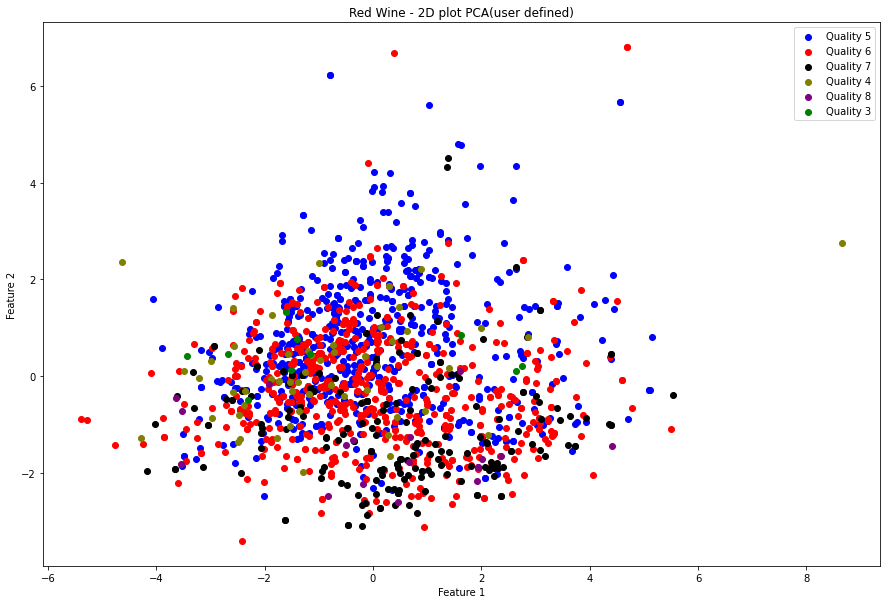

In [18]:
#Red 2d user defined
plt.figure(figsize=(15,10))

color = ["blue","red","black", "olive","purple","green", "cyan"]
for i in range(len(target_red)):
    indices = df_red.index[df_red["quality"] == target_red[i]].to_list()
    x = red_pca_user_2d[0][indices]
    y = red_pca_user_2d[1][indices]
    plt.scatter(x,y, c=color[i])
legend_list = ["Quality "+str(x) for x in target_red]
plt.legend(legend_list)
plt.title("Red Wine - 2D plot PCA(user defined)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [19]:
import os

In [20]:
d = os.path.join(os.getcwd(),"results/")

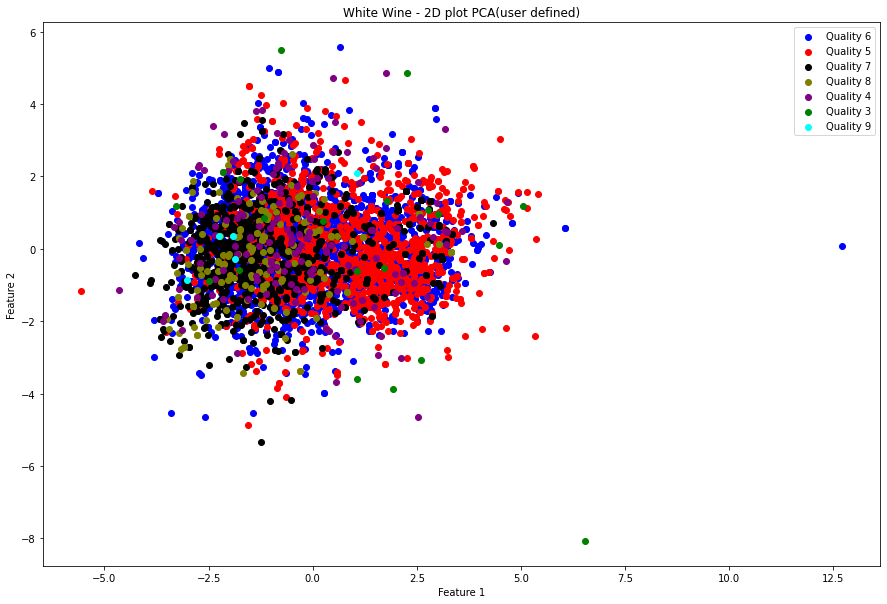

In [26]:
#White 2d user defined
plt.figure(figsize=(15,10))

color = ["blue","red","black", "olive","purple","green", "cyan"]
for i in range(len(target_white)):
    indices = df_white.index[df_white["quality"] == target_white[i]].to_list()
    x = white_pca_user_2d[0][indices]
    y = white_pca_user_2d[1][indices]
    plt.scatter(x,y, c=color[i])
legend_list = ["Quality "+str(x) for x in target_white]
plt.legend(legend_list)
plt.title("White Wine - 2D plot PCA(user defined)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.savefig(d+"pow.jpg")
plt.show()

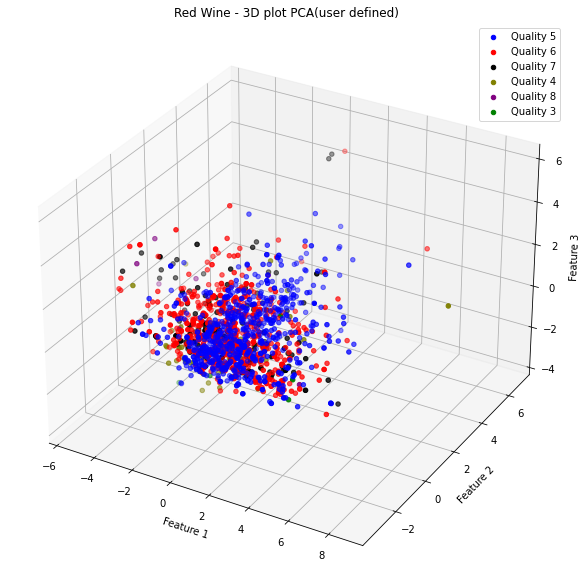

In [59]:
#RED 3D user defined
plt.figure(figsize=(10,15))
ax = plt.axes(projection = "3d")

color = ["blue","red","black", "olive","purple","green", "cyan"]
for i in range(len(target_red)):
    indices = df_red.index[df_red["quality"] == target_red[i]].to_list()
    x = red_pca_user_3d[0][indices]
    y = red_pca_user_3d[1][indices]
    z = red_pca_user_3d[2][indices]
    ax.scatter3D(x,y,z, c=color[i])
legend_list = ["Quality "+str(x) for x in target_red]
plt.legend(legend_list)
plt.title("Red Wine - 3D plot PCA(user defined)")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.show()


2198
1457
880
175
163
20
5


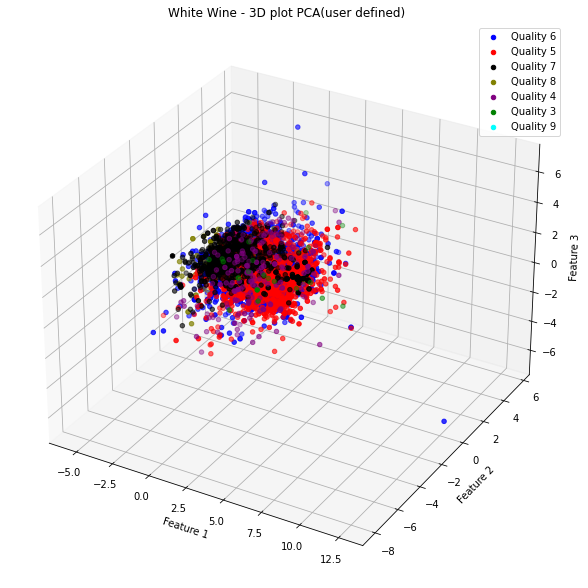

In [81]:
#WHITE 3D user defined
plt.figure(figsize=(10,15))
ax = plt.axes(projection = "3d")

color = ["blue","red","black", "olive","purple","green", "cyan"]
for i in range(len(target_white)):
    indices = df_white.index[df_white["quality"] == target_white[i]].to_list()
    print(len(indices))
    x = white_pca_user_3d[0][indices]
    y = white_pca_user_3d[1][indices]
    z = white_pca_user_3d[2][indices]
    ax.scatter3D(x,y,z, c=color[i])
legend_list = ["Quality "+str(x) for x in target_white]
plt.legend(legend_list)
plt.title("White Wine - 3D plot PCA(user defined)")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.show()

Part 3

In [11]:
from sklearn.decomposition import PCA
PCA2d = PCA(n_components=2)
PCA3d = PCA(n_components=3)

In [12]:
scale = StandardScaler()
scale.fit(features_red)
scaledData_RED = scale.transform(features_red)

In [13]:
scale = StandardScaler()
scaledData_WHITE = scale.fit_transform(features_white)

In [14]:
red_pca_sklearn_2d =PCA2d.fit_transform(scaledData_RED)
red_pca_sklearn_3d =PCA3d.fit_transform(scaledData_RED)
# red_pca_sklearn_3d

In [15]:
white_pca_sklearn_2d = PCA2d.fit_transform(scaledData_WHITE)
white_pca_sklearn_3d = PCA3d.fit_transform(scaledData_WHITE)
# white_pca_sklearn_3d

In [54]:
#Note shape of red_pca_user_2d is transpose of that from sklearn
red_pca_sklearn_2d.T

array([[-1.61952988, -0.79916993, -0.74847909, ..., -1.45612897,
        -2.27051793, -0.42697475],
       [ 0.45095009,  1.85655306,  0.88203886, ...,  0.31174559,
         0.97979111, -0.53669021]])

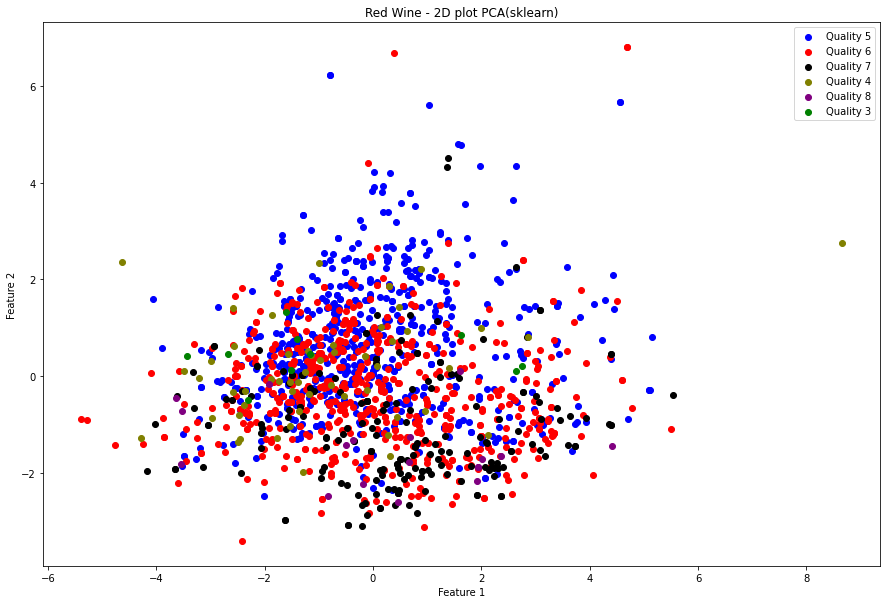

In [91]:
#RED 2d sklearn
plt.figure(figsize=(15,10))

color = ["blue","red","black", "olive","purple","green", "cyan"]
for i in range(len(target_red)):
    indices = df_red.index[df_red["quality"] == target_red[i]].to_list()
    x = red_pca_sklearn_2d.T[0][indices] #note transpose here
    y = red_pca_sklearn_2d.T[1][indices]
    plt.scatter(x,y, c=color[i])
legend_list = ["Quality "+str(x) for x in target_red]
plt.legend(legend_list)
plt.title("Red Wine - 2D plot PCA(sklearn)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
# plt.savefig("temp.jpg")
plt.show()

In [96]:
import os
c =os.getcwd()

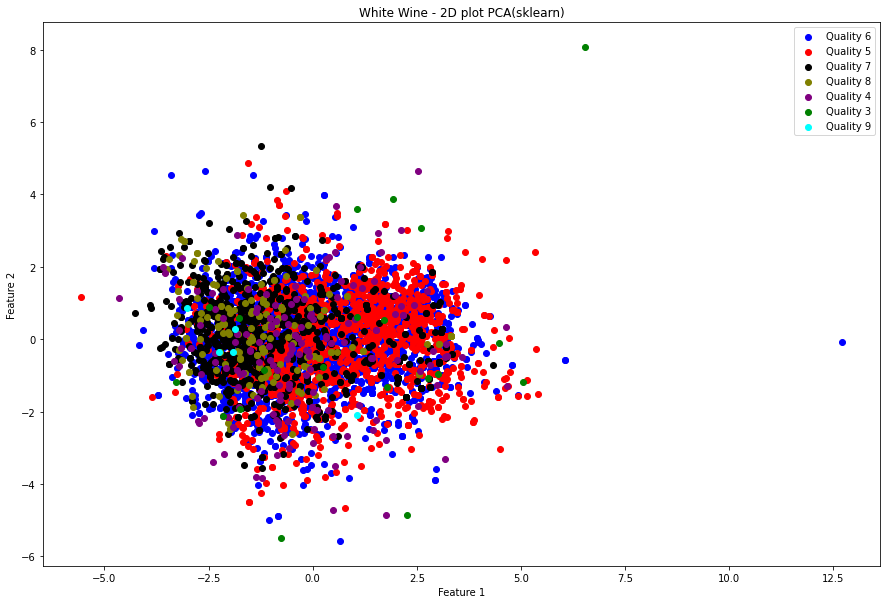

In [100]:
#WHITE 2d sklearn
plt.figure(figsize=(15,10))

color = ["blue","red","black", "olive","purple","green", "cyan"]
for i in range(len(target_white)):
    indices = df_white.index[df_white["quality"] == target_white[i]].to_list()
    x = white_pca_sklearn_2d.T[0][indices] #note transpose here
    y = white_pca_sklearn_2d.T[1][indices]
    plt.scatter(x,y, c=color[i])
legend_list = ["Quality "+str(x) for x in target_white]
plt.legend(legend_list)
plt.title("White Wine - 2D plot PCA(sklearn)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
# plt.savefig("static\\temp.jpg")
plt.show()

In [62]:
list(df_white.quality.unique())

[6, 5, 7, 8, 4, 3, 9]

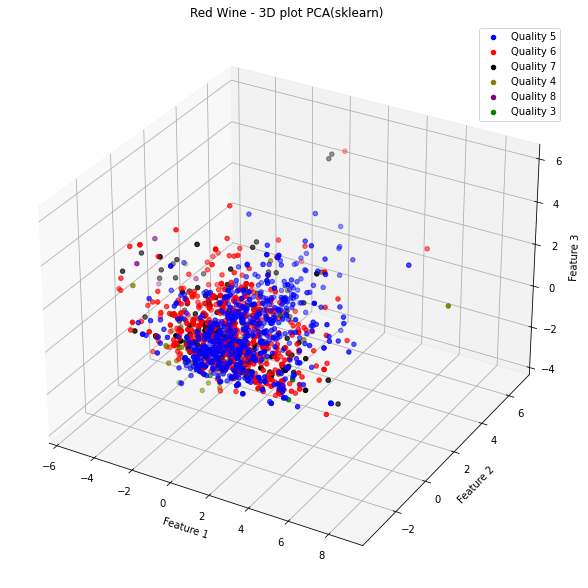

In [61]:
#RED 3d sklearn
plt.figure(figsize=(10,15))
ax = plt.axes(projection = "3d")

color = ["blue","red","black", "olive","purple","green", "cyan"]
for i in range(len(target_red)):
    indices = df_red.index[df_red["quality"] == target_red[i]].to_list()
    x = red_pca_sklearn_3d.T[0][indices] #Note the transpose
    y = red_pca_sklearn_3d.T[1][indices]
    z = red_pca_sklearn_3d.T[2][indices]
    ax.scatter3D(x,y,z, c=color[i])
legend_list = ["Quality "+str(x) for x in target_red]
plt.legend(legend_list)
plt.title("Red Wine - 3D plot PCA(sklearn)")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.show()

2198
1457
880
175
163
20
5


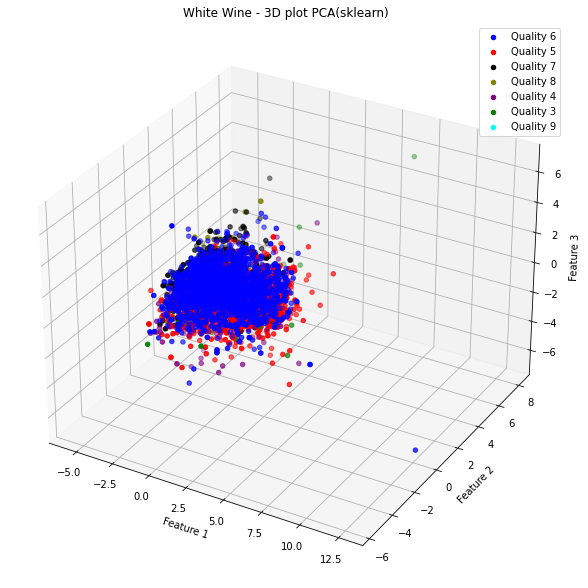

<Figure size 432x288 with 0 Axes>

In [89]:
#WHITE 3d sklearn
plt.figure(figsize=(10,15))
ax = plt.axes(projection = "3d")

color = ["blue","red","black", "olive","purple","green", "cyan"]
for i in range(len(target_white)):
    indices = df_white.index[df_white["quality"] == target_white[i]].to_list()
    print(len(indices))
    x = white_pca_sklearn_3d.T[0][indices]
    y = white_pca_sklearn_3d.T[1][indices]
    z = white_pca_sklearn_3d.T[2][indices]
    ax.scatter3D(x,y,z, c=color[i])
legend_list = ["Quality "+str(x) for x in target_white]
plt.legend(legend_list)
plt.title("White Wine - 3D plot PCA(sklearn)")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.show()

In [87]:
pd.DataFrame(red_pca_sklearn_2d, columns= ["feature1","feature2"])

,feature1,feature2
0,-1.619530,0.450950
1,-0.799170,1.856553
2,-0.748479,0.882039
3,2.357673,-0.269976
4,-1.619530,0.450950
...,...,...
1594,-2.150500,0.814286
1595,-2.214496,0.893101
1596,-1.456129,0.311746
1597,-2.270518,0.979791


In [88]:
pd.DataFrame(red_pca_user_2d.T,columns= ["feature1","feature2"])

,feature1,feature2
0,-1.619530,0.450950
1,-0.799170,1.856553
2,-0.748479,0.882039
3,2.357673,-0.269976
4,-1.619530,0.450950
...,...,...
1594,-2.150500,0.814286
1595,-2.214496,0.893101
1596,-1.456129,0.311746
1597,-2.270518,0.979791
